##              ***Object Detection Course***

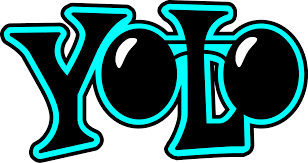

## YOLO MODEL TEST ON IMAGES

In [1]:
from ultralytics import YOLO
import cv2

model = YOLO('yolov8n.pt')
results = model('testimages/3.png',show=True)
cv2.waitKey(0)
cv2.destroyAllWindows()  


image 1/1 C:\Users\rajsi\testimages\3.png: 384x640 15 cars, 8 motorcycles, 165.0ms
Speed: 3.0ms preprocess, 165.0ms inference, 12.5ms postprocess per image at shape (1, 3, 384, 640)


## YOLO MODEL TEST ON LIVE WEBCAM

In [ ]:
import cv2
from ultralytics import YOLO
import cvzone
import math

vid = cv2.VideoCapture(0)

model = YOLO('yolov8n.pt')

classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]
  
while(True):
  
    ret, frame = vid.read()
    result=model(frame,show=True)
    for r in result:
        boxes=r.boxes
        for box in boxes:
            (x1,y1,x2,y2)=box.xyxy[0]
            x1,y1,x2,y2=int(x1),int(y1),int(x2),int(y2)
            w,h=x2-x1,y2-y1
            cvzone.cornerRect(frame,(x1,y1,w,h))
            conf=math.ceil((box.conf[0]*100))/100
            print(conf)
            cls=box.cls[0]
            cvzone.putTextRect(frame,f'{cls} {conf}',(max(0,x1),max(35,y1)))
            
            
            
   
    cv2.imshow('frame', frame)
    
   
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vid.release()

cv2.destroyAllWindows()   